# 九 K-means

## 1 聚类

无监督学习，聚类后同一类的数据尽可能聚集到一起，不同数据尽量分离

- 分类
  - 基于划分：聚类目标是使得类内的点足够近，类间的点足够远，如k-means
  - 基于密度的聚类：当邻近区域的密度超过某个阈值，则继续聚类，如DBSCAN; OPTICS
  - 层次聚类：包括合并的层次聚类，分裂的层次聚类，实际上可以看作是二叉树的生成和分裂过程
  - 基于图的聚类： 通过建图来进行聚类，这是聚类算法中的大头，很多较新的聚类算法都有图聚类的思想

## 2 距离计算

- `欧式距离`

$$
d(x,y)=\sqrt{\Sigma_{k=1}^n (x_k-y_k)^2}
$$

- `曼哈顿距离`

$$
d(x,y)=\Sigma_{k=1}^n \left|x_k-y_k\right|
$$

- `切比雪夫距离`

$$
d(x,y) = \lim_{n\rightarrow \infty} (\Sigma_{k=1}^n (\left|x_k-y_k\right|)^r)^\dfrac{1}{r} = max_k (\left|x_k-y_k\right|)
$$

- `闵可夫斯基距离`

$$
d(x,y)=(\Sigma_{k=1}^n (\left|x_k-y_k\right|)^r)^\dfrac{1}{r}
$$

        r = 1时，为曼哈顿距离
        r = 2时，为欧式距离
        r →∞时，为切比雪夫距离

- `余弦相似度`

$$
cos⁡(x,y)=\dfrac{xy}{\left|x\right|\left|y\right|} = \dfrac{\Sigma_{k=1}^n x_k y_k}{\sqrt{\Sigma_{k=1}^n x_k^2} \sqrt{\Sigma_{k=1}^n y_k^2}}
$$

- `马氏距离`

$$
mahalanobis(x,y)=(x-y)\Sigma^{-1}(x-y)^T
$$

        Σ−1是数据协方差矩阵的逆

## 3 K-means

将数据集分为k个簇，每个簇的中心点代表每个簇，将数据点划分到距离其中心点最近的簇中，计算每个簇的均值，重新划分该簇的中心点，迭代计算，直到收敛

- 算法步骤：
  1. 首先，确定要形成的簇的数量K。
  2. 随机选择K个中心点作为初始聚类中心。
  3. 将每个数据样本分配给与其最近的中心点所对应的簇。
  4. 更新每个簇的中心点为该簇中所有数据样本的平均值。
  5. 重复上述两个步骤，直到簇的中心点不再发生变化或达到最大迭代次数

- k值的选取
  - 手肘法：通过绘制k和损失函数的关系图，选拐点处的k值
  - 经验选取人工据经验先定几个k，多次随机初始化中心选经验上最适合的

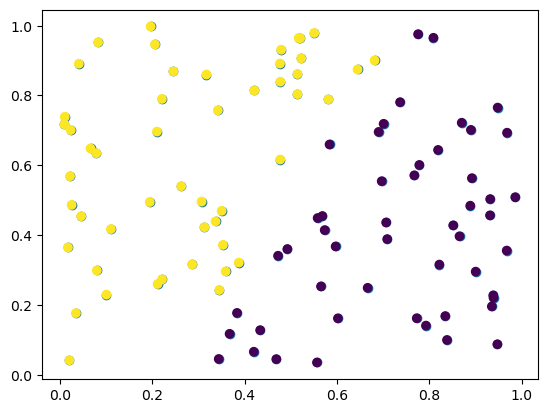

[[0.02070595 0.20289289]
 [0.61584482 0.53795713]]
[1 0]


In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn import datasets

# 聚类前
X = np.random.rand(100, 2)
plt.scatter(X[:, 0], X[:, 1], marker='o')

# 初始化我们的质心，从原有的数据中选取K个座位质心
def InitCentroids(X, k):
    index = np.random.randint(0,len(X)-1,k)
    return X[index]

#聚类后,假设k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=5).fit(X)
label_pred = kmeans.labels_
plt.scatter(X[:, 0], X[:, 1], c=label_pred)
plt.show()

new_samples = np.random.rand(2, 2)
labels = kmeans.predict(new_samples)
print(new_samples)
print(labels)